<a href="https://colab.research.google.com/github/Michael-Stout/Assignement_5_1/blob/main/frogmore_email.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

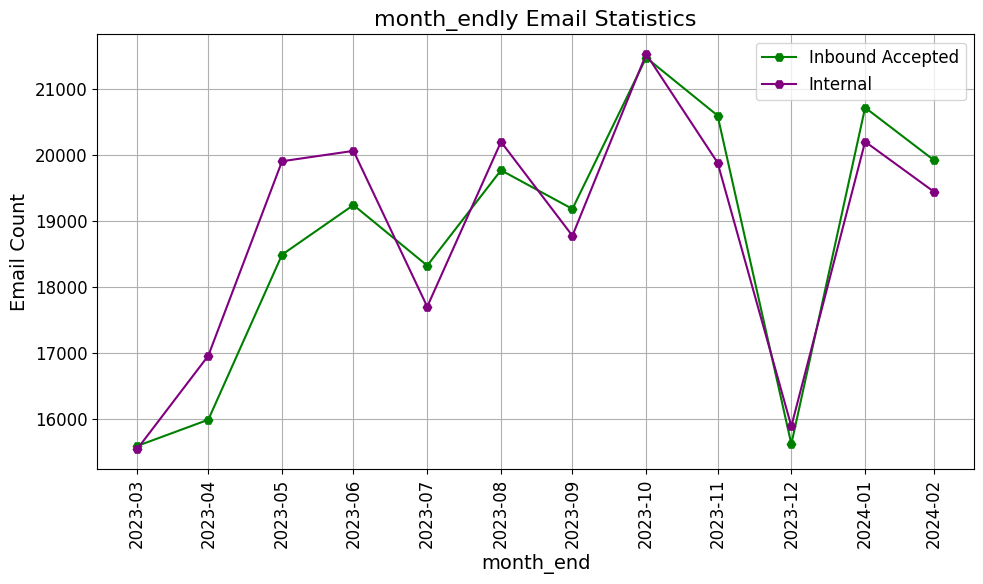

In [95]:
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

# Load the data

data = pd.read_csv('email_stats.csv')

# Convert 'month_end' column to datetime for proper handling
data['month_end'] = pd.to_datetime(data['month_end']).dt.to_period('M').dt.to_timestamp('M')

# Create a new column 'rejected' which is the difference between 'inbound_all' and 'inbound_accepted'
data['inbound_rejected'] = data['inbound_all'] - data['inbound_accepted']

data.to_csv('up_email_stat.csv', index=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(data['month_end'], data['inbound_accepted'], label='Inbound Accepted', color='green', marker='H')
#plt.plot(data['month_end'], data['inbound_rejected'], label='Inbound Rejected', color='red', marker='H')
plt.plot(data['month_end'], data['internal'], label='Internal', color='purple', marker='H')

# Adding titles and labels
plt.title('month_endly Email Statistics')
plt.xlabel('month_end')
plt.ylabel('Email Count')
plt.legend()
plt.grid(True)

# Show the plot
#plt.xticks(rotation=90)  # Rotate dates for better visibility
plt.xticks(data['month_end'], data['month_end'].dt.strftime('%Y-%m'), rotation=90)

plt.tight_layout()
plt.show()

In [96]:
data.head(0)

,month_end,inbound_all,inbound_accepted,outbound,internal,inbound_rejected


In [97]:
# Calculate total emails for proportion calculations
data['total_emails'] = data['inbound_accepted'] + data['outbound'] + data['internal']

# Calculate proportions for each category per month_end
data['inbound_accepted_prop'] = data['inbound_accepted'] / data['total_emails']
data['outbound_prop'] = data['outbound'] / data['total_emails']
data['internal_prop'] = data['internal'] / data['total_emails']

# Display the proportions
proportions = data[['month_end', 'inbound_accepted_prop', 'outbound_prop', 'internal_prop']]
print(proportions)


    month_end  inbound_accepted_prop  outbound_prop  internal_prop
0  2023-03-31               0.360816       0.279548       0.359636
1  2023-04-30               0.354278       0.269983       0.375739
2  2023-05-31               0.356352       0.260053       0.383596
3  2023-06-30               0.359866       0.264935       0.375199
4  2023-07-31               0.372344       0.267948       0.359708
5  2023-08-31               0.333896       0.324946       0.341157
6  2023-09-30               0.375987       0.255982       0.368031
7  2023-10-31               0.375354       0.248348       0.376298
8  2023-11-30               0.376253       0.260515       0.363231
9  2023-12-31               0.364638       0.264449       0.370914
10 2024-01-31               0.372185       0.264899       0.362916
11 2024-02-29               0.370295       0.268294       0.361411


In [99]:
# Display the proportions
email_totals = data[['month_end', 'inbound_accepted', 'outbound', 'internal']]
print(email_totals)

    month_end  inbound_accepted  outbound  internal
0  2023-03-31             15597     12084     15546
1  2023-04-30             15996     12190     16965
2  2023-05-31             18495     13497     19909
3  2023-06-30             19246     14169     20066
4  2023-07-31             18329     13190     17707
5  2023-08-31             19773     19243     20203
6  2023-09-30             19187     13063     18781
7  2023-10-31             21477     14210     21531
8  2023-11-30             20601     14264     19888
9  2023-12-31             15628     11334     15897
10 2024-01-31             20721     14748     20205
11 2024-02-29             19923     14435     19445


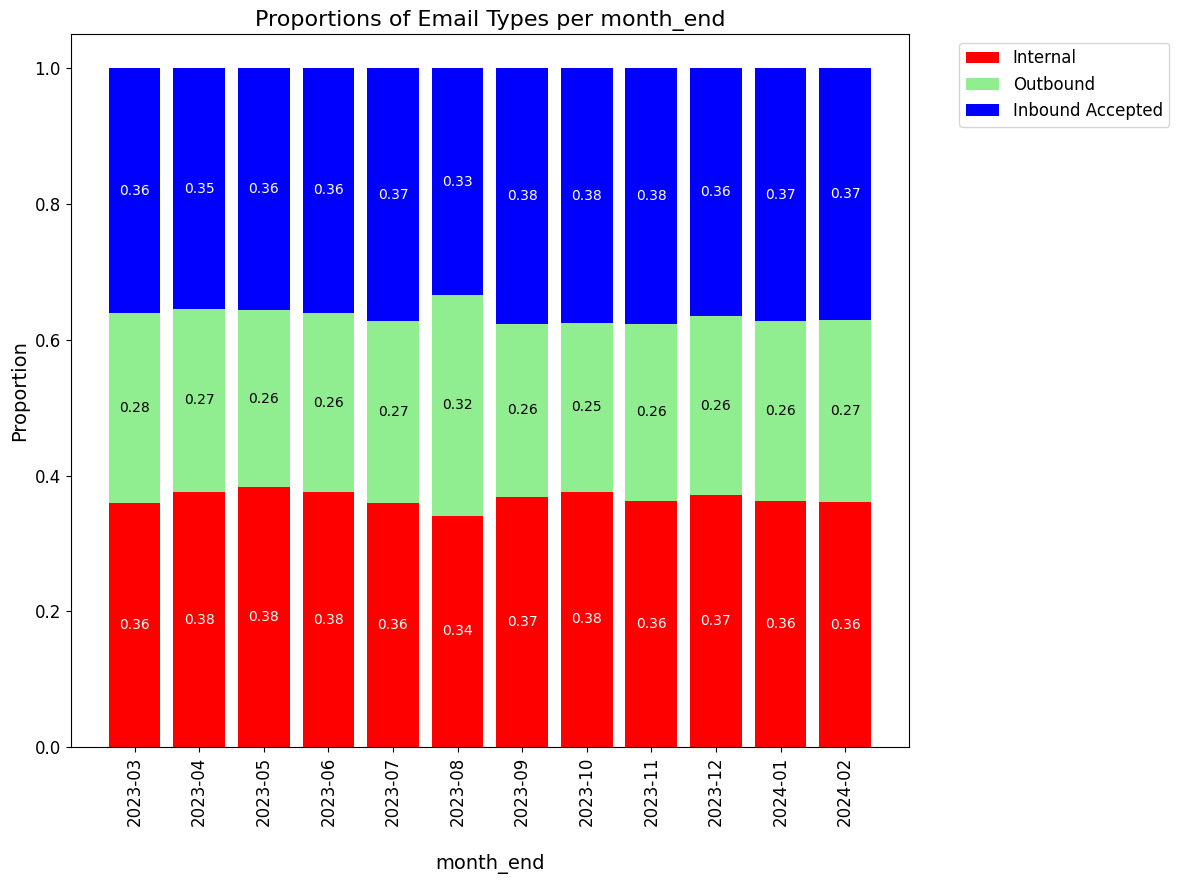

In [101]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

# Assuming 'data' is your DataFrame loaded with the appropriate columns

# Adjusting global font sizes
mpl.rcParams.update({'font.size': 12})  # Adjusts the default font size
mpl.rcParams.update({'axes.labelsize': 14})  # Adjusts the font size for axis labels
mpl.rcParams.update({'axes.titlesize': 16})  # Adjusts the font size for the title
mpl.rcParams.update({'xtick.labelsize': 12})  # Adjusts the font size for the x-axis tick labels
mpl.rcParams.update({'ytick.labelsize': 12})  # Adjusts the font size for the y-axis tick labels
mpl.rcParams.update({'legend.fontsize': 12})  # Adjusts the font size for the legend

plt.figure(figsize=(12, 9))
# Internal at the bottom
plt.bar(data['month_end'].dt.strftime('%Y-%m'), data['internal_prop'], label='Internal', color='red')
# Outbound above Internal
bottom_stack_outbound = data['internal_prop']
plt.bar(data['month_end'].dt.strftime('%Y-%m'), data['outbound_prop'], bottom=bottom_stack_outbound, label='Outbound', color='lightgreen')
# Inbound Accepted on top
bottom_stack_inbound_accepted = data['internal_prop'] + data['outbound_prop']
plt.bar(data['month_end'].dt.strftime('%Y-%m'), data['inbound_accepted_prop'], bottom=bottom_stack_inbound_accepted, label='Inbound Accepted', color='blue')

plt.title('Proportions of Email Types per month_end')
plt.xlabel('\nmonth_end')
plt.ylabel('Proportion')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjusting proportion number font size and positions within each segment of the stack
for idx, (pos, row) in enumerate(zip(range(len(data)), data.iterrows())):
    _, row = row
    # Internal proportion text
    plt.text(pos, row['internal_prop']/2, f"{row['internal_prop']:.2f}", ha='center', va='center', color='white', fontsize=10)
    # Outbound proportion text, adjusted to new position
    plt.text(pos, row['internal_prop'] + row['outbound_prop']/2, f"{row['outbound_prop']:.2f}", ha='center', va='center', color='black', fontsize=10)
    # Inbound Accepted proportion text, adjusted to new position
    plt.text(pos, row['internal_prop'] + row['outbound_prop'] + row['inbound_accepted_prop']/2, f"{row['inbound_accepted_prop']:.2f}", ha='center', va='center', color='white', fontsize=10)

plt.tight_layout()
plt.show()


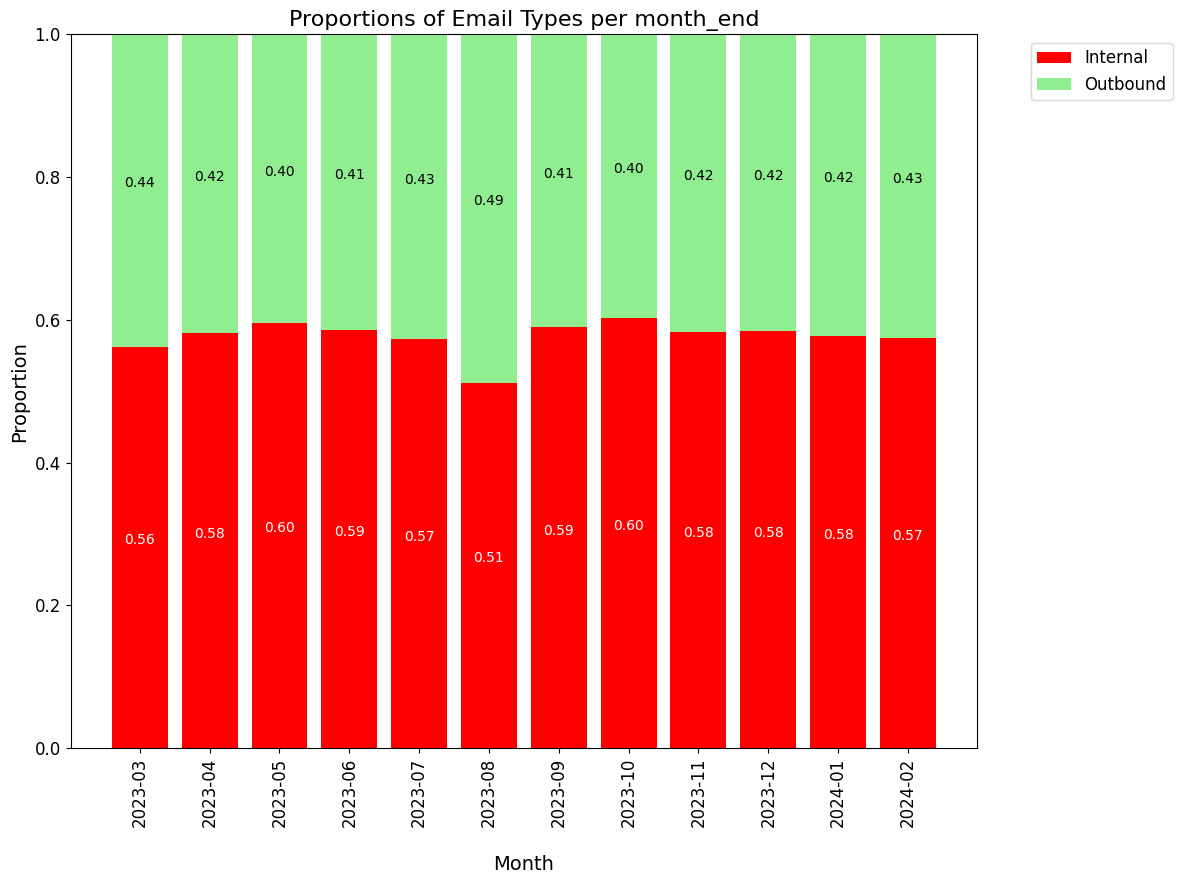

In [105]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

# Assuming 'data' is your DataFrame and it includes 'internal_prop' and 'outbound_prop'

# First, calculate the new proportions based on the sum of 'Internal' and 'Outbound' only
total_emails_internal_outbound = data['internal_prop'] + data['outbound_prop']
data['internal_prop_new'] = data['internal_prop'] / total_emails_internal_outbound
data['outbound_prop_new'] = data['outbound_prop'] / total_emails_internal_outbound

# Adjusting global font sizes
mpl.rcParams.update({
    'font.size': 12,
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12
})

plt.figure(figsize=(12, 9))
# Internal at the bottom with new proportion
plt.bar(data['month_end'].dt.strftime('%Y-%m'), data['internal_prop_new'], label='Internal', color='red')
# Outbound above Internal with new proportion
plt.bar(data['month_end'].dt.strftime('%Y-%m'), data['outbound_prop_new'], bottom=data['internal_prop_new'], label='Outbound', color='lightgreen')

plt.title('Proportions of Email Types per month_end')
plt.xlabel('\nMonth')
plt.ylabel('Proportion')
plt.xticks(rotation=90)
plt.ylim(0, 1)  # Set y-axis range from 0 to 1
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjusting proportion number font size and positions within each segment
for idx, (pos, row) in enumerate(zip(range(len(data)), data.iterrows())):
    _, row = row
    # Internal proportion text with new proportion
    plt.text(pos, row['internal_prop_new']/2, f"{row['internal_prop_new']:.2f}", ha='center', va='bottom', color='white', fontsize=10)
    # Outbound proportion text with new proportion, adjusted to new position
    plt.text(pos, row['internal_prop_new'] + row['outbound_prop_new']/2, f"{row['outbound_prop_new']:.2f}", ha='center', va='bottom', color='black', fontsize=10)

plt.tight_layout()
plt.show()
